# download the dataset

# load the dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

In [13]:
data=pd.read_csv(r"D:\ibm\Mall_Customers.csv")

# Perform Below Visualizations

# Univariate Analysis

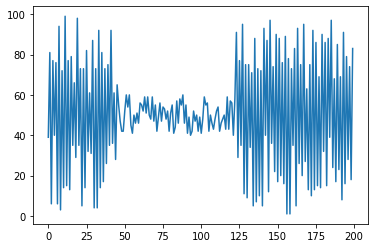

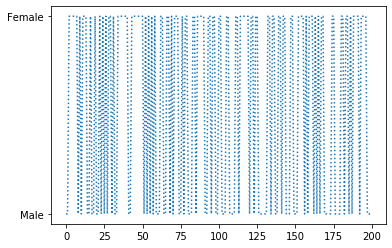

In [10]:
%matplotlib inline
plt.plot(data['Spending Score (1-100)'])
plt.show()
data=np.array(data['Gender'])
plt.plot(data,linestyle = 'dotted')

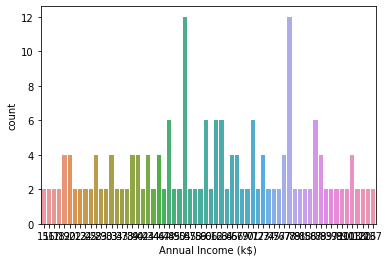

In [14]:
sns.countplot(data['Annual Income (k$)'])

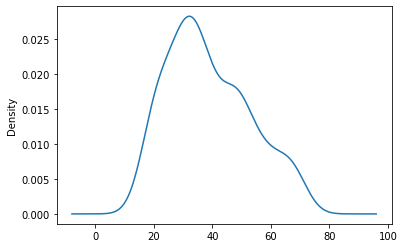

In [15]:
data['Age'].plot(kind='density')

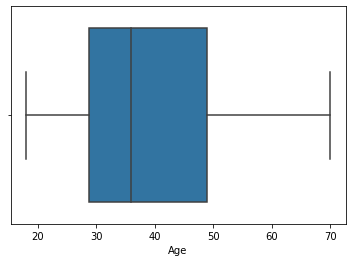

In [16]:
sns.boxplot(data['Age'])

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

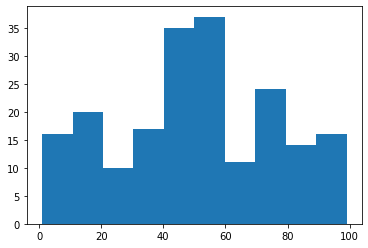

In [17]:
plt.hist(data['Spending Score (1-100)'])

# Bi- Variate Analysis


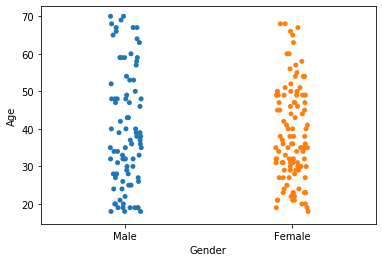

In [18]:
sns.stripplot(x=data['Gender'],y=data['Age'])

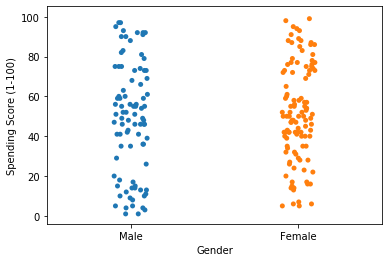

In [19]:
sns.stripplot(x=data['Gender'],y=data['Spending Score (1-100)'])

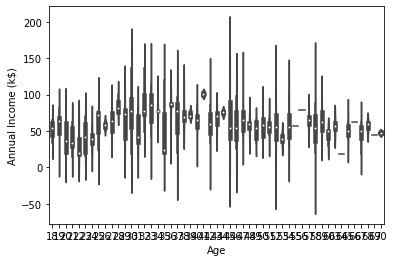

In [20]:
sns.violinplot(x ='Age', y ='Annual Income (k$)', data = data)

# Multivariate Analysis

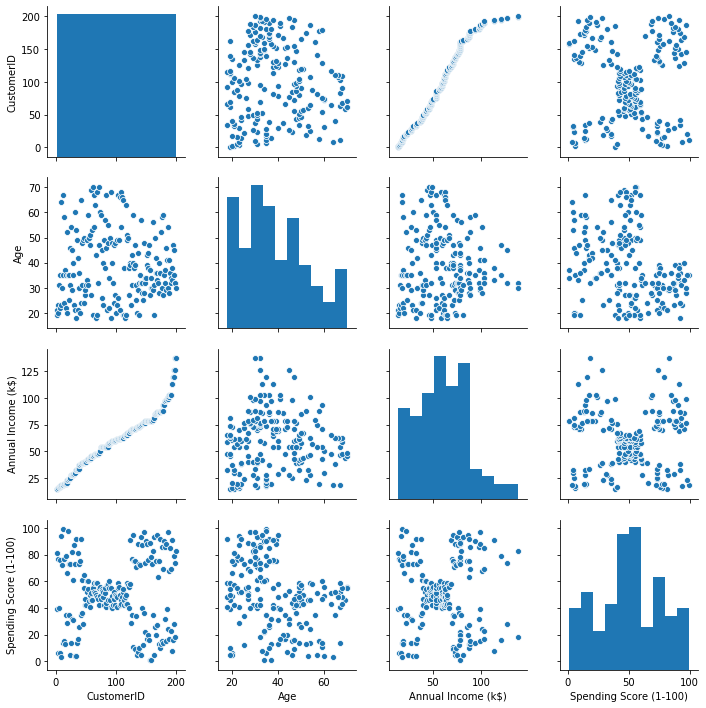

In [21]:
sns.pairplot(data)

# descriptive statistics

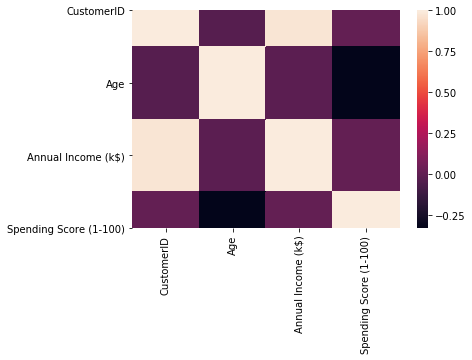

In [22]:
sns.heatmap(data.corr(),annot=False)

In [23]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [27]:
data.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [28]:
data.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [29]:
data.median()

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

# Check for Missing values

In [30]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Outliers

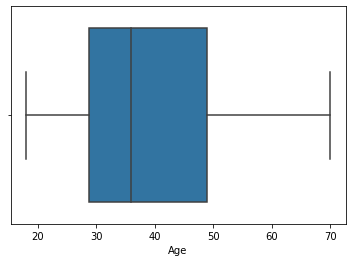

In [31]:
sns.boxplot(data['Age'])

In [32]:
Q1 = data['Age'].quantile(0.15)
Q3 = data['Age'].quantile(0.25)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['Age']=np.where(data['Age']>upper_whisker,upper_whisker,np.where(data['Age']<lower_whisker,lower_whisker,data['Age']))

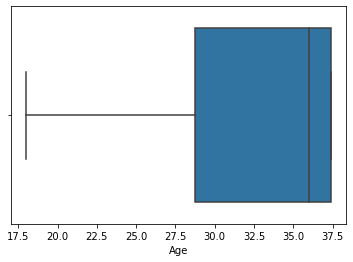

In [33]:
sns.boxplot(data['Age'])

# Categorical columns and perform encoding

In [34]:
numeric_data = data.select_dtypes(include=[np.number]) 
categorical_data = data.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  4
Number of categorical variables:  1


In [35]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Categorical_variables = list(categorical_data.columns)
Categorical_variables

Number of categorical variables:  1


['Gender']

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(data['Gender'])
data["Gender"] = label

In [37]:
data['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

# Scaling the data

In [38]:
X = data.drop("Gender",axis=1)
Y = data['Gender']

In [39]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[-1.7234121  -2.11853528 -1.73899919 -0.43480148]
 [-1.70609137 -1.80137444 -1.73899919  1.19570407]
 [-1.68877065 -1.95995486 -1.70082976 -1.71591298]
 [-1.67144992 -1.48421361 -1.70082976  1.04041783]
 [-1.6541292  -0.21557026 -1.66266033 -0.39597992]
 [-1.63680847 -1.64279402 -1.66266033  1.00159627]
 [-1.61948775  0.41875142 -1.62449091 -1.71591298]
 [-1.60216702 -1.48421361 -1.62449091  1.70038436]
 [-1.5848463   0.79537991 -1.58632148 -1.83237767]
 [-1.56752558 -0.37415068 -1.58632148  0.84631002]
 [-1.55020485  0.79537991 -1.58632148 -1.4053405 ]
 [-1.53288413  0.41875142 -1.58632148  1.89449216]
 [-1.5155634   0.79537991 -1.54815205 -1.36651894]
 [-1.49824268 -1.32563319 -1.54815205  1.04041783]
 [-1.48092195  0.73591226 -1.54815205 -1.44416206]
 [-1.46360123 -1.64279402 -1.54815205  1.11806095]
 [-1.4462805   0.41875142 -1.50998262 -0.59008772]
 [-1.42895978 -1.95995486 -1.50998262  0.61338066]
 [-1.41163905  0.79537991 -1.43364376 -0.82301709]
 [-1.39431833  0.41875142 -1.43

In [40]:
X_scaled  = pd.DataFrame(scale, columns = X.columns)
X_scaled

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-2.118535,-1.738999,-0.434801
1,-1.706091,-1.801374,-1.738999,1.195704
2,-1.688771,-1.959955,-1.700830,-1.715913
3,-1.671450,-1.484214,-1.700830,1.040418
4,-1.654129,-0.215570,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,0.418751,2.268791,1.118061
196,1.671450,0.795380,2.497807,-0.861839
197,1.688771,-0.056990,2.497807,0.923953
198,1.706091,-0.056990,2.917671,-1.250054


# train test split

In [41]:
from sklearn.model_selection import train_test_split

# split the dataset

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=0)
X_train.shape

(160, 4)

In [43]:
X_test.shape

(40, 4)

In [44]:
Y_train.shape

(160,)

In [45]:
Y_test.shape

(40,)

# Clustering Algorithm

In [46]:
x = data.iloc[:, [3, 4]].values 

In [47]:
from sklearn.cluster import KMeans  
wcss_list= []

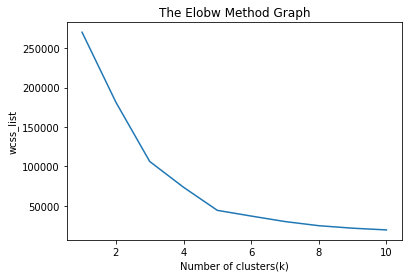

In [48]:
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

# training the K-means model on a dataset

In [49]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

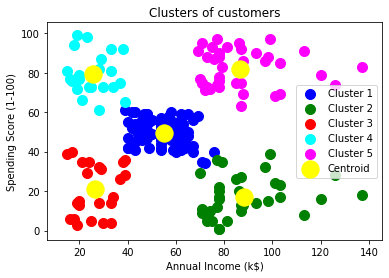

In [50]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show() 
